In [38]:
import numpy as np
import pandas as pd
import PySAM.Pvsamv1 as pv

import matplotlib.pyplot as plt

In [39]:
pvmodel = pv.default('PVBatteryResidential')

In [40]:
# there are formatting differences between the weather file that we download from
# pvwatts and what SAM wants --- SAM wants the file from the NSRDB 
pvmodel.SolarResource.solar_resource_file = "../data/tmy_5.579_-0.233_2005_2014.epw"

In [41]:
our_load_profile = np.loadtxt("../data/Max_load_profile_for_year.txt", skiprows=1)

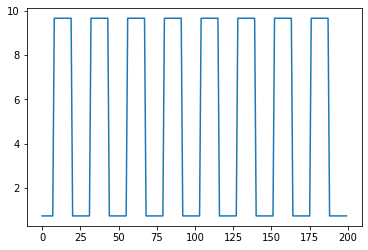

In [42]:
plt.plot(our_load_profile[:200])

In [43]:
pvmodel.Load.load = tuple(our_load_profile)

In [44]:
pvmodel.Module.module_model = 1 # set it to CEC model

In [55]:
pvmodel.CECPerformanceModelWithModuleDatabase.export()

{'cec_a_ref': 2.42033,
 'cec_adjust': 4.86979,
 'cec_alpha_sc': 0.002492,
 'cec_area': 1.631,
 'cec_array_cols': 10.0,
 'cec_array_rows': 1.0,
 'cec_backside_temp': 20.0,
 'cec_beta_oc': -0.16975,
 'cec_bifacial_ground_clearance_height': 1.0,
 'cec_bifacial_transmission_factor': 0.013,
 'cec_bifaciality': 0.65,
 'cec_gamma_r': -0.31,
 'cec_gap_spacing': 0.05,
 'cec_heat_transfer': 0.0,
 'cec_height': 0.0,
 'cec_i_l_ref': 6.23681,
 'cec_i_mp_ref': 5.85,
 'cec_i_o_ref': 3.99e-12,
 'cec_i_sc_ref': 6.23,
 'cec_is_bifacial': 0.0,
 'cec_module_length': 1.631,
 'cec_module_width': 1.0,
 'cec_mounting_config': 0.0,
 'cec_mounting_orientation': 0.0,
 'cec_n_s': 96.0,
 'cec_r_s': 0.499389,
 'cec_r_sh_ref': 457.185,
 'cec_standoff': 6.0,
 'cec_t_noct': 46.4,
 'cec_temp_corr_mode': 0.0,
 'cec_transient_thermal_model_unit_mass': 11.0919,
 'cec_v_mp_ref': 57.3,
 'cec_v_oc_ref': 67.9}

In [46]:
pvmodel.Inverter.inverter_model = 0. # set it to CEC

In [59]:
# inverter settings 
pvmodel.Inverter.export()

{'inv_cec_cg_eff_cec': 96.6364,
 'inv_cec_cg_paco': 3800.0,
 'inv_ds_eff': 96.0,
 'inv_ds_paco': 4000.0,
 'inv_num_mppt': 1.0,
 'inv_pd_eff': 95.0,
 'inv_pd_paco': 4000.0,
 'inv_snl_eff_cec': 97.0529,
 'inv_snl_paco': 3850.0,
 'inverter_count': 10.0,
 'inverter_model': 0.0,
 'mppt_hi_inverter': 480.0,
 'mppt_low_inverter': 100.0}

In [50]:
# System Design
pvmodel.SystemDesign.inverter_count = 10.
pvmodel.SystemDesign.subarray1_modules_per_string = 10.
pvmodel.SystemDesign.subarray1_nstrings = 10.

In [56]:
pvmodel.BatterySystem.batt_computed_bank_capacity = 4000

In [58]:
pvmodel.BatteryCell.export()

{'LeadAcid_q10_computed': 18.8325,
 'LeadAcid_q20_computed': 20.25,
 'LeadAcid_qn_computed': 12.15,
 'LeadAcid_tn': 1.0,
 'batt_C_rate': 0.2,
 'batt_Cp': 1500.0,
 'batt_Qexp': 2.584,
 'batt_Qfull': 3.2,
 'batt_Qfull_flow': 20.25,
 'batt_Qnom': 3.126,
 'batt_Vexp': 3.53,
 'batt_Vfull': 4.2,
 'batt_Vnom': 3.342,
 'batt_Vnom_default': 3.6,
 'batt_calendar_a': 0.00266,
 'batt_calendar_b': -7280.0,
 'batt_calendar_c': 930.0,
 'batt_calendar_choice': 1.0,
 'batt_calendar_lifetime_matrix': ((0.0, 100.0),
  (3650.0, 80.0),
  (7300.0, 50.0)),
 'batt_calendar_q0': 1.02,
 'batt_chem': 1.0,
 'batt_h_to_ambient': 7.5,
 'batt_initial_SOC': 50.0,
 'batt_lifetime_matrix': ((10.0, 0.0, 100.853),
  (10.0, 1250.0, 94.884),
  (10.0, 2500.0, 88.9147),
  (10.0, 3750.0, 82.9454),
  (10.0, 5000.0, 76.9761),
  (20.0, 0.0, 100.853),
  (20.0, 1250.0, 94.8798),
  (20.0, 2500.0, 88.9063),
  (20.0, 3750.0, 82.9328),
  (20.0, 5000.0, 76.9593),
  (40.0, 0.0, 100.853),
  (40.0, 1250.0, 94.7822),
  (40.0, 2500.0, 88.71

In [57]:
pvmodel.execute()

<BarContainer object of 12 artists>

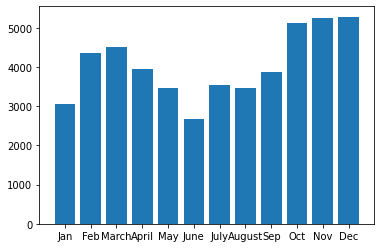

In [52]:
months = ["Jan", "Feb", "March", "April", "May", "June", "July", "August", "Sep", "Oct", "Nov", "Dec"]
plt.bar(months, pvmodel.Outputs.monthly_energy)

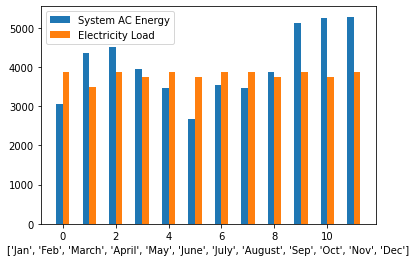

In [71]:
dates = pd.date_range(start="1/1/2006", end="1/1/2007", freq="H").delete(-1)

hourly_load_w_dates = pd.DataFrame({"Load" : pvmodel.Load.load, "Dates" : dates})
monthly_load = hourly_load_w_dates.groupby(hourly_load_w_dates["Dates"].dt.month)["Load"].sum()

months = ["Jan", "Feb", "March", "April", "May", "June", "July", "August", "Sep", "Oct", "Nov", "Dec"]

x = np.arange(len(months))  # the label locations
width = 0.25  # the width of the bars

f, ax = plt.subplots()
ax.bar(x - width/2, pvmodel.Outputs.monthly_energy, width, label="System AC Energy")
ax.bar(x + width/2, monthly_load.values, width, label="Electricity Load")
ax.set_xlabel(months)
plt.legend();

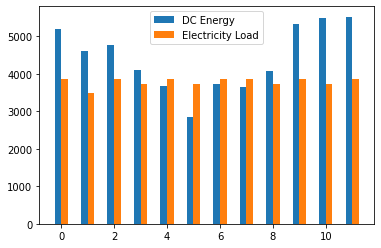

In [74]:
# Monthly DC energy (apparently SAM is plotting this) ---- different from "MOnthly Energy" 
f, ax = plt.subplots()
ax.bar(x - width/2, pvmodel.Outputs.monthly_dc, width, label="DC Energy")
ax.bar(x + width/2, monthly_load.values, width, label="Electricity Load")
plt.legend();

In [15]:
diff_of_energy_load = pvmodel.Outputs.monthly_energy - monthly_load.values

diff_of_energy_load

array([ -814.43491271,   874.43507267,   650.11996113,   204.02212016,
        -409.05857581, -1061.16770118,  -324.64477751,  -412.29532988,
         128.25392488,  1241.964009  ,  1518.25363921,  1414.85821034])

In [61]:
pvmodel.Outputs.monthly_ac

(3053.2490872911094,
 4367.827072665778,
 4517.8039611257645,
 3946.942120163828,
 3458.625424188155,
 2681.7522988196383,
 3543.0392224897423,
 3455.388670123864,
 3871.1739248818985,
 5109.648009002089,
 5261.173639210415,
 5282.5422103356195)